In [1]:
import numpy as np
import requests
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
from IPython.display import display_html
import pandas as pd
import seaborn as sns

In [2]:
# Example request: 'https://api.scryfall.com/cards/search?q=c%3Dwhite+cmc%3D1'
def req_wrapper(params):
    cardsSite = "https://api.scryfall.com/cards/search?q="
    req = cardsSite + "+".join([str(k) + "%3D" + str(v) for k,v in params.items()])
    return requests.get(req)

In [50]:
names = []
rarities = []
prices = []

for rarity in ['common', 'uncommon', 'rare', 'mythic']:
    params = {"set" : "hou", "rarity" : rarity}
    r = req_wrapper(params).json()
    for data in r['data']:
        names += [data['name']]
        rarities += [data['rarity']]
        prices += [data['prices']['eur']]

In [51]:
dfs = pd.DataFrame({
    'names' : names,
    'rarity' : rarities,
    'price' : prices
})
dfs['price'] = dfs['price'].astype(float)
dfs

,names,rarity,price
0,Act of Heroism,common,0.02
1,Aerial Guide,common,0.02
2,Ambuscade,common,0.10
3,Aven of Enduring Hope,common,0.02
4,Aven Reedstalker,common,0.02
5,Beneath the Sands,common,0.12
6,Bitterbow Sharpshooters,common,0.03
7,Blur of Blades,common,0.01
8,Brambleweft Behemoth,common,0.12
9,Carrion Screecher,common,0.02


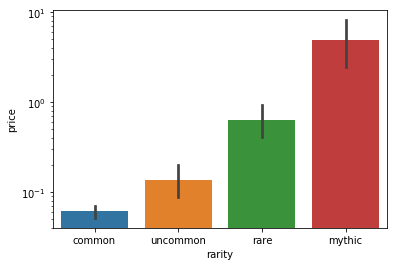

In [52]:
ax = sns.barplot(x="rarity", y="price", data=dfs)
ax.set_yscale('log')
plt.show()

In [53]:
dfs[dfs['rarity'] == 'mythic']

,names,rarity,price
185,Crested Sunmare,mythic,4.38
186,Majestic Myriarch,mythic,0.69
187,"Neheb, the Eternal",mythic,5.02
188,"Nicol Bolas, God-Pharaoh",mythic,6.11
189,"Nicol Bolas, the Deceiver",mythic,7.82
190,"Nissa, Genesis Mage",mythic,2.72
191,Overwhelming Splendor,mythic,1.42
192,"Razaketh, the Foulblooded",mythic,9.53
193,"Samut, the Tested",mythic,0.87
194,The Locust God,mythic,5.92


In [55]:
for rarity in set(dfs['rarity']):
    print(rarity, np.nanmedian(dfs[dfs['rarity'] == rarity]['price']))

uncommon 0.07500000000000001
mythic 3.55
common 0.05
rare 0.29000000000000004
